In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchtext.data.utils import get_tokenizer

/Users/martinaemmerich/.pyenv/versions/3.12.5/envs/classifier/lib/python3.12/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [3]:
import torch
print(torch.__version__)

2.3.0


Loading the data from CSV file.

In [4]:
# read data
data = pd.read_csv('./IMDB_Dataset.csv')
print(len(data))
data.head()

50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Checking if the dataset is split evenly between the two label classes and if there is any missing data. It seems the data is balanced and there are no missing values anywhere. 

In [5]:
# check dataset is balanced
#positive= len(data[data['sentiment'] == 'positive'])
#print(positive)
print(data.sentiment.value_counts())

#check null values
data.isnull().any()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64


review       False
sentiment    False
dtype: bool

Now we check if there are any duplicate reviews. There seem to be a small amount of duplicate reviews per class, more for the negative class. We will remove these from our data in the final model to avoid the model becoming biased towards these data points. Removing them will cause a slight dataset imbalance so we will use the F1 Score to evalaute our model performance instead of just using accuracy.

In [6]:
# checking for duplicates
print(data.groupby('sentiment').describe())

          review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5  


Converting labels to 1 for the positive class and 0 for the negative class.

In [7]:
# convert labels to numerical features, 1 for the positive class, 0 for the negative one
data.loc[data['sentiment'] == 'positive', 'sentiment'] = 1 #positive class
data.loc[data['sentiment'] == 'negative', 'sentiment'] = 0 #negative class
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Plotting the lengths of the reviews and finding their average length, i.e. 267. We will use this number to truncate or pad all reviews to the same length during training.  

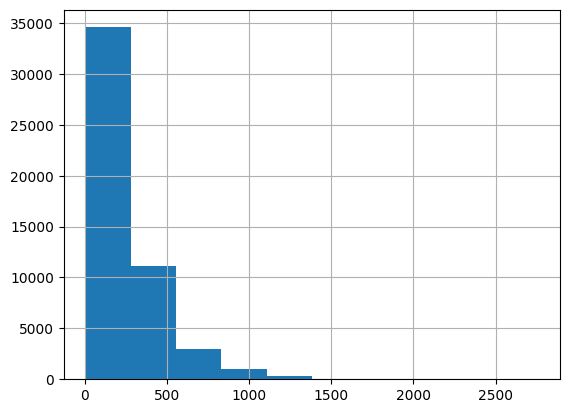

count    50000.00000
mean       267.66206
std        197.42522
min          8.00000
25%        147.00000
50%        201.00000
75%        325.00000
max       2752.00000
dtype: float64

In [9]:
tokenizer = get_tokenizer("basic_english")
rev_len = [len(tokenizer(i)) for i in data.review]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()